<a href="https://colab.research.google.com/github/amanullah33/Prediction-of-Soft-Drinks-by-using-Machine-Learning/blob/main/Soft_Drinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import tree
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import r2_score, confusion_matrix, classification_report, accuracy_score

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.ensemble import RandomForestClassifier

**Upload Dataset**

In [ ]:
from google.colab import files
files.upload()

Saving dataset.csv to dataset.csv


{'dataset.csv': b'Age,Soft Drink,Area,Gender\r\n23,Pepsi,East Raza Bazar,Male\r\n24,Sprite,East Raza Bazar,Female\r\n24,Coca Cola,East Raza Bazar,Female\r\n22,7up,Subahanbagh,Female\r\n25,Coca Cola,East Raza Bazar,Female\r\n24,Speed,East Raza Bazar,Male\r\n24,Sprite,East Raza Bazar,Male\r\n16,Mountain Dew,Sukrabad,Female\r\n10,Pran Up,West Raza Bazar,Female\r\n20,Mojo,Tollabagh,Male\r\n14,Fanta,East Raza Bazar,Female\r\n19,Sprite,West Raza Bazar,Male\r\n23,Coca Cola,West Raza Bazar,Female\r\n28,Mountain Dew,West Raza Bazar,Female\r\n25,Sprite,West Raza Bazar,Male\r\n25,Coca Cola,East Raza Bazar,Male\r\n24,Coca Cola,Tollabagh,Male\r\n18,Fanta,Subahanbagh,Male\r\n11,Black Horse,East Raza Bazar,Female\r\n28,Pran Up,Tollabagh,Female\r\n28,Mojo,East Raza Bazar,Female\r\n32,7up,East Raza Bazar,Female\r\n22,Coca Cola,West Raza Bazar,Female\r\n39,Clemon,East Raza Bazar,Male\r\n38,Coca Cola,Subahanbagh,Female\r\n31,Mojo,East Raza Bazar,Female\r\n22,Sprite,West Raza Bazar,Female\r\n16,Tiger,West

**Load Dataset**

In [ ]:
df = pd.read_csv("dataset.csv")

**Show Dataset**

In [ ]:
df

,Age,Soft Drink,Area,Gender
0,23,Pepsi,East Raza Bazar,Male
1,24,Sprite,East Raza Bazar,Female
2,24,Coca Cola,East Raza Bazar,Female
3,22,7up,Subahanbagh,Female
4,25,Coca Cola,East Raza Bazar,Female
...,...,...,...,...
4995,26,Black Horse,West Raza Bazar,Male
4996,24,Mountain Dew,East Raza Bazar,Male
4997,24,Mojo,East Raza Bazar,Female
4998,24,Mojo,East Raza Bazar,Female


**Null Checking**

In [ ]:
df.isnull().sum()

Age           0
Soft Drink    0
Area          0
Gender        0
dtype: int64

**Visualization**

In [ ]:
plt.scatter(df['Age'], df['Area'])
plt.xlabel('Age')
plt.ylabel('Area')
plt.title('Visualization of Age and Area')

In [ ]:
plt.scatter(df['Gender'], df['Age'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Visualization of Gender and Age')

In [ ]:
plt.scatter(df['Age'], df['Soft Drink'])
plt.xlabel('Age')
plt.ylabel('Soft Drink')
plt.title('Visualization of Age and Drinks')

In [ ]:
plt.scatter(df['Gender'], df['Area'])
plt.xlabel('Gender')
plt.ylabel('Area')
plt.title('Visualization of Gender and Area')

In [ ]:
plt.scatter(df['Area'], df['Soft Drinks'])
plt.xlabel('Area')
plt.ylabel('Soft Drinks')
plt.title('Visualization of Area and Soft Drinks')

In [ ]:
plt.scatter(df['Gender'], df['Soft Drinks'])
plt.xlabel('Gender')
plt.ylabel('Soft Drinks')
plt.title('Visualization of Gender and Soft Drinks')

In [ ]:
plt.scatter(df['Gender'], df['Area'], df['Age'])
plt.xlabel('Gender')
plt.ylabel('Area')
plt.title('Visualization of Gender and Area with Age')

In [ ]:
plt.scatter(df['Area'], df['Soft Drinks'], df['Age'])
plt.xlabel('Area')
plt.ylabel('Soft Drinks')
plt.title('Visualization of Area and Soft Drinks with Age')

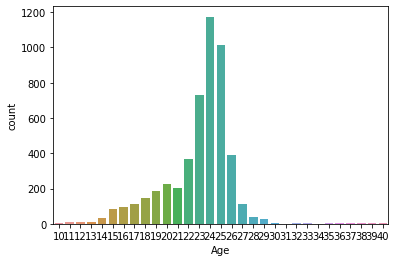

In [ ]:
sns.countplot(x='Age', data=df)

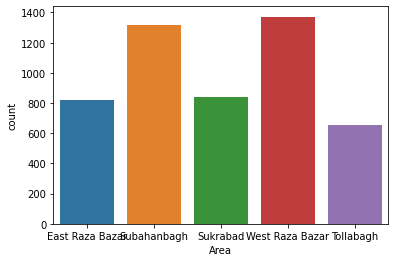

In [ ]:
sns.countplot(x='Area', data=df)

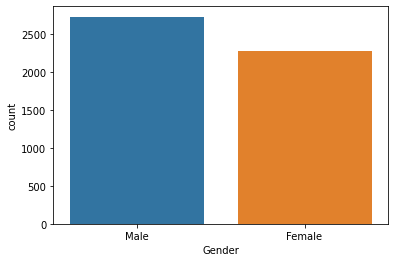

In [ ]:
sns.countplot(x='Gender', data=df)

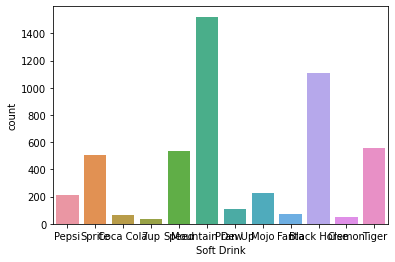

In [ ]:
sns.countplot(x='Soft Drink', data=df)

In [ ]:
df['Age'].plot.hist()

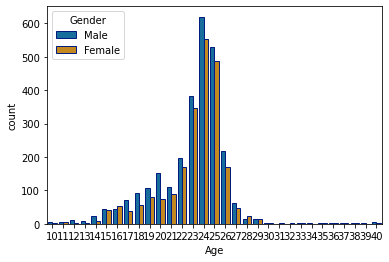

In [ ]:
sns.countplot(x='Age', hue='Gender', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

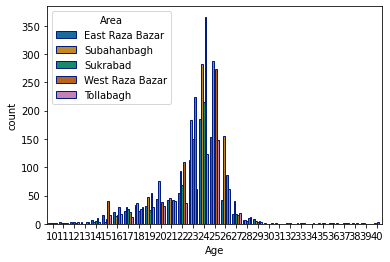

In [ ]:
sns.countplot(x='Age', hue='Area', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

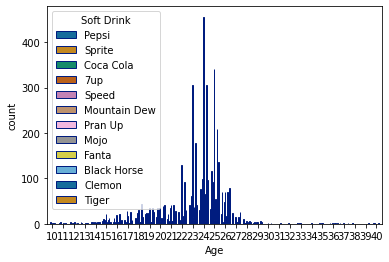

In [ ]:
sns.countplot(x='Age', hue='Soft Drink', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

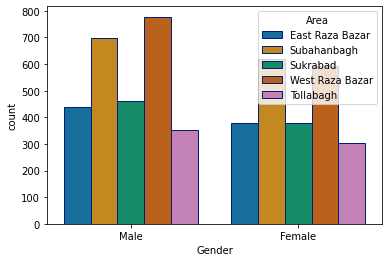

In [ ]:
sns.countplot(x='Gender', hue='Area', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

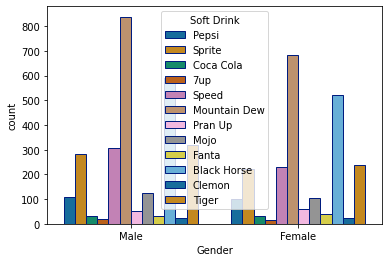

In [ ]:
sns.countplot(x='Gender', hue='Soft Drink', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

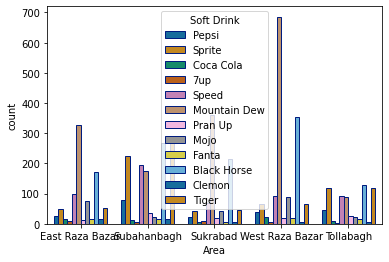

In [ ]:
sns.countplot(x='Area', hue='Soft Drink', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

**See Null in Visually**

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

**One Hot Encoding**

In [ ]:
Gender_dummies = pd.get_dummies(df["Gender"])
Area_dummies = pd.get_dummies(df["Area"])
Soft_Drinks_dummies = pd.get_dummies(df["Soft Drink"])

**After Encodding, Concat data in Dataset**

In [ ]:
dataset = pd.concat([df, Soft_Drinks_dummies, Area_dummies, Gender_dummies], axis="columns")

**After concat, drop the Encoded Columns**

In [ ]:
dataset.drop(['Soft Drink', 'Area', 'Gender'], axis='columns', inplace=True)

**Show Dataset**

In [ ]:
dataset

**Divided data in x, y variable**

In [ ]:
x = dataset.drop('Age', axis=1)
y = dataset['Age']

In [ ]:
x

In [ ]:
y

**Decision Tree Algorithm**

In [ ]:
Classify = tree.DecisionTreeClassifier()
Classify = Classify.fit(x, y)
pred = Classify.predict([[0, 0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1]])
pred

array([13])

**Divided data into Train and Test**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Linear Regression Algorithm**

In [ ]:
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
pred = regressor.predict(xtest)
pred
regressor.score(xtest, ytest)

0.041380674847097065

**R Square Score Algorithm**

In [ ]:
score = r2_score(ytest, pred)
score

0.041380674847097065

**Logistic Regression Algorithm**

In [ ]:
logistic = LogisticRegression().fit(xtrain, ytrain)
logistic.score(xtest, ytest)
logistic_pred = logistic.predict(xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Performance Matrix**

In [ ]:
confusion_matrix(ytest, logistic_pred)

**Performance Matrix Algorithm**

In [ ]:
accuracy = accuracy_score(ytest, logistic_pred)
accuracy

0.23745173745173745

**Classification Report**

In [ ]:
print(classification_report(ytest, logistic_pred))

**SVC Algorithm**

In [ ]:
model = SVC(gamma='auto')
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.243

**Random Forest Algorithm**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
rfc.score(xtest, ytest)

0.242

**Decision Tree Algorithm**

In [ ]:
decision = tree.DecisionTreeClassifier()
decision.fit(xtrain, ytrain)
decision.score(xtest, ytest)

0.242

**Naive Bayes Algorithm**

In [ ]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
gnb.score(xtest, ytest)

In [ ]:
bnb = BernoulliNB()
bnb.fit(xtrain, ytrain)
bnb.score(xtest, ytest)

0.232

In [ ]:
mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
mnb.score(xtest, ytest)

0.246